In [45]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='lon', ylabel='lat'>

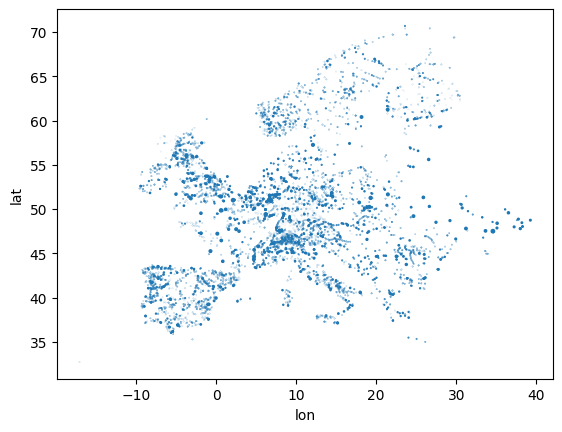

In [46]:
file = "https://raw.githubusercontent.com/PyPSA/powerplantmatching/master/powerplants.csv"
ppl = pd.read_csv(file, index_col=0)

ppl.plot.scatter("lon", "lat", s=ppl.Capacity / 1e3)

In [47]:
ppl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6374 entries, 0 to 6616
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 6374 non-null   object 
 1   Fueltype             6374 non-null   object 
 2   Technology           5702 non-null   object 
 3   Set                  6374 non-null   object 
 4   Country              6374 non-null   object 
 5   Capacity             6374 non-null   float64
 6   Efficiency           542 non-null    float64
 7   DateIn               4450 non-null   float64
 8   DateRetrofit         1871 non-null   float64
 9   DateOut              349 non-null    float64
 10  lat                  6374 non-null   float64
 11  lon                  6374 non-null   float64
 12  Duration             452 non-null    float64
 13  Volume_Mm3           6374 non-null   float64
 14  DamHeight_m          6374 non-null   float64
 15  StorageCapacity_MWh  6374 non-null   float6

<Axes: xlabel='lon', ylabel='lat'>

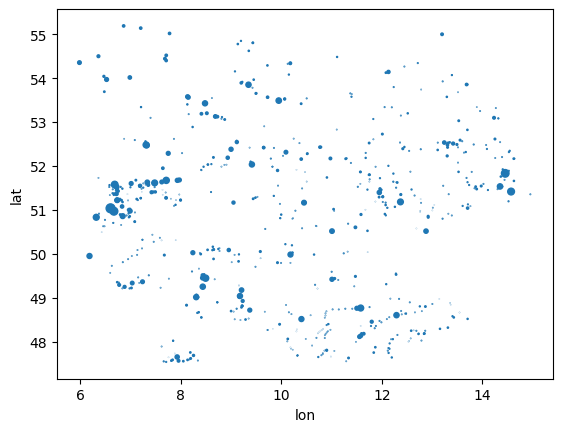

In [48]:
ppl_ger = ppl.loc[ppl["Country"] == 'Germany']
ppl_ger = ppl_ger.loc[ppl_ger['Capacity'] >= 1]
ppl_ger.plot.scatter("lon", "lat", s=ppl_ger.Capacity / 1e2)

In [49]:
network_1 = pypsa.Network()

In [50]:
network_1.set_snapshots(range(4))

load_el = [4, 3, 14, 13]
pv_pu = [0, 0.6, 0.6, 0]

network_1.add("Bus", 
              name="electricity")
network_1.add("Load", 
              name="electrical_load", 
              bus="electricity", 
              p_set=load_el)
network_1.add("Generator", 
              name="pv_generator", 
              bus="electricity", 
              p_nom_extendable=True, 
              p_nom_max=16.28,
              marginal_cost=0,
              p_max_pu=pv_pu)
network_1.add("Generator",
              name='diesel_generator',
              bus='electricity',
              marginal_cost=15,
              p_nom=20)

In [51]:
print(network_1)

PyPSA Network
Components:
 - Bus: 1
 - Generator: 2
 - Load: 1
Snapshots: 4


In [52]:
network_1.optimize(solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-04-24


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-04-24
INFO:linopy.io: Writing time: 0.02s


Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-78h0cpe9.lp


INFO:gurobipy:Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-78h0cpe9.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 22 rows, 9 columns, 28 nonzeros


INFO:gurobipy:obj: 22 rows, 9 columns, 28 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22621.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22621.2))


INFO:gurobipy:


CPU model: 11th Gen Intel(R) Core(TM) i7-1195G7 @ 2.90GHz, instruction set [SSE2|AVX|AVX2|AVX512]


INFO:gurobipy:CPU model: 11th Gen Intel(R) Core(TM) i7-1195G7 @ 2.90GHz, instruction set [SSE2|AVX|AVX2|AVX512]


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 22 rows, 9 columns and 28 nonzeros


INFO:gurobipy:Optimize a model with 22 rows, 9 columns and 28 nonzeros


Model fingerprint: 0x5c9fa209


INFO:gurobipy:Model fingerprint: 0x5c9fa209


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [6e-01, 1e+00]


INFO:gurobipy:  Matrix range     [6e-01, 1e+00]


  Objective range  [2e+01, 2e+01]


INFO:gurobipy:  Objective range  [2e+01, 2e+01]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [3e+00, 2e+01]


INFO:gurobipy:  RHS range        [3e+00, 2e+01]


Presolve removed 22 rows and 9 columns


INFO:gurobipy:Presolve removed 22 rows and 9 columns


Presolve time: 0.00s


INFO:gurobipy:Presolve time: 0.00s


Presolve: All rows and columns removed


INFO:gurobipy:Presolve: All rows and columns removed


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0    3.1848000e+02   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:       0    3.1848000e+02   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 0 iterations and 0.00 seconds (0.00 work units)


INFO:gurobipy:Solved in 0 iterations and 0.00 seconds (0.00 work units)


Optimal objective  3.184800000e+02


INFO:gurobipy:Optimal objective  3.184800000e+02
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 9 primals, 22 duals
Objective: 3.18e+02
Solver model: available
Solver message: 2

d:\mhafeman\projects\mmg\.venv\lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lo

('ok', 'optimal')

<Axes: xlabel='snapshot'>

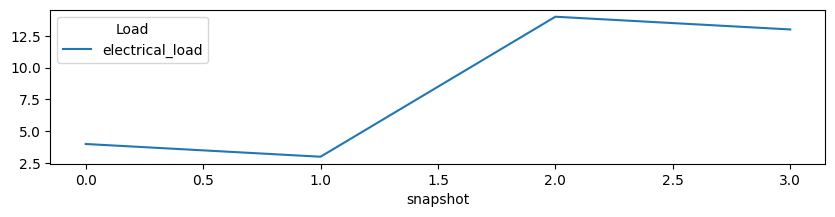

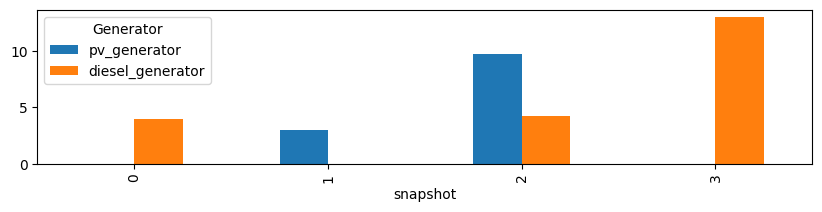

In [53]:
network_1.loads_t.p.plot(figsize=(10, 2))
network_1.generators_t.p.plot(kind="bar", figsize=(10, 2))

In [54]:
network_1.generators_t.p

Generator,pv_generator,diesel_generator
snapshot,,
0,0.000,4.000
1,3.000,0.000
2,9.768,4.232
3,0.000,13.000


In [55]:
network_1.add('Store', name='battery', bus='electricity', e_nom=5)

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - OutputFlag: 0


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-04-24


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-04-24
INFO:linopy.io: Writing time: 0.03s


Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-n7lbabzb.lp


INFO:gurobipy:Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-n7lbabzb.lp


Reading time = 0.00 seconds


INFO:gurobipy:Reading time = 0.00 seconds


obj: 34 rows, 17 columns, 51 nonzeros


INFO:gurobipy:obj: 34 rows, 17 columns, 51 nonzeros
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 17 primals, 34 duals
Objective: 2.43e+02
Solver model: available
Solver message: 2

d:\mhafeman\projects\mmg\.venv\lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-

<Axes: xlabel='snapshot'>

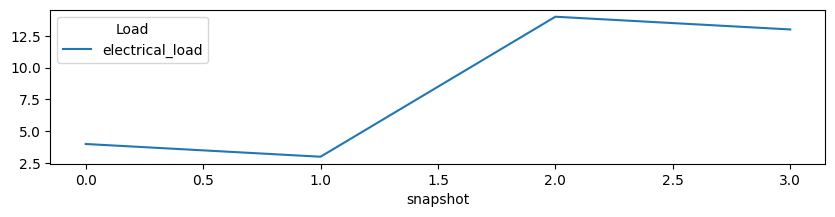

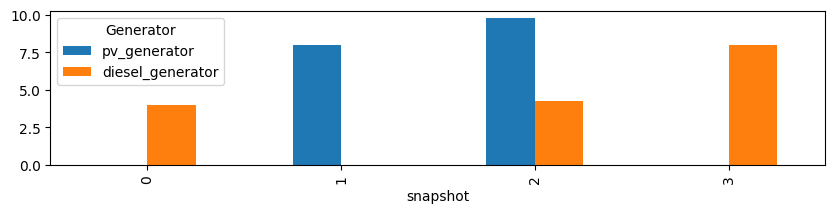

In [56]:
network_1.optimize(solver_name='gurobi', solver_options={'OutputFlag': 0})
network_1.loads_t.p.plot(figsize=(10, 2))
network_1.generators_t.p.plot(kind="bar", figsize=(10, 2))


In [57]:
network_1.remove('Store', 'battery')

In [58]:
network_1.add('Bus',
              name='battery_bus')
network_1.add('Store', 
              name='battery', 
              bus='battery_bus', 
              e_nom=5)
network_1.add('Link',
              name='charge',
              bus0='electricity',
              bus1='battery_bus',
              p_nom=9999,
              efficiency=0.9)
network_1.add('Link',
              name="discharge",
              bus0='battery_bus',
              bus1='electricity',
              p_nom=9999,
              efficiency=0.9)

In [59]:
network_1.optimize(solver_name='gurobi', solver_options={'OutputFlag': 0})

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - OutputFlag: 0


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-04-24


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-04-24
INFO:linopy.io: Writing time: 0.04s


Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-idhp5161.lp


INFO:gurobipy:Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-idhp5161.lp


Reading time = 0.02 seconds


INFO:gurobipy:Reading time = 0.02 seconds


obj: 54 rows, 25 columns, 83 nonzeros


INFO:gurobipy:obj: 54 rows, 25 columns, 83 nonzeros
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 25 primals, 54 duals
Objective: 2.51e+02
Solver model: available
Solver message: 2

d:\mhafeman\projects\mmg\.venv\lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-

('ok', 'optimal')

<Axes: xlabel='snapshot'>

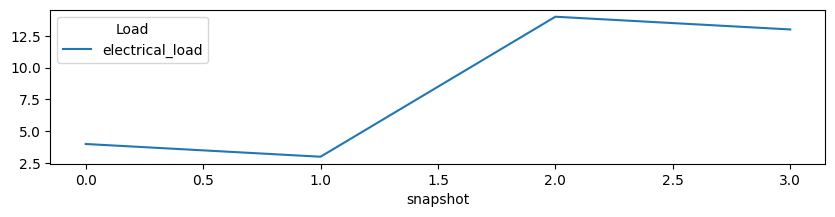

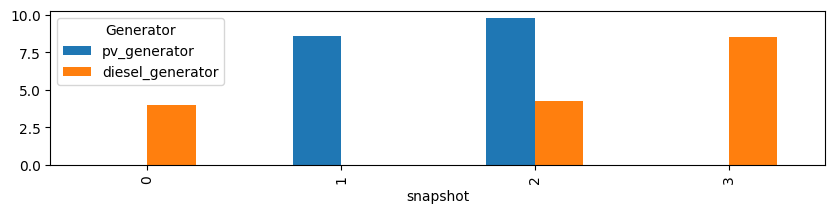

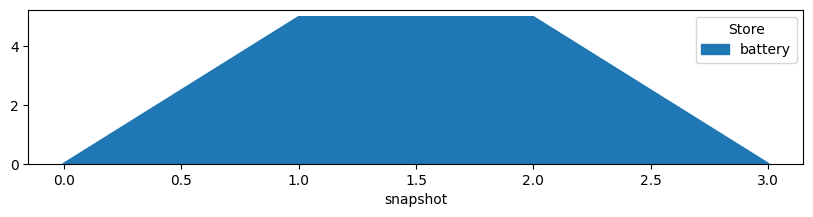

In [60]:
network_1.loads_t.p.plot(figsize=(10, 2))
network_1.generators_t.p.plot(kind="bar", figsize=(10, 2))
network_1.stores_t.e.plot(kind="area", figsize=(10, 2))

In [61]:
network_1.remove('Generator', 'pv_generator')
network_1.remove('Generator', 'diesel_generator')

In [62]:
network_1.add('Bus',
              name='pv_bus')
network_1.add('Generator', 
              name='feedin_pv', 
              bus='pv_bus',
              sign=-1, 
              p_nom=10, 
              marginal_cost=-20)
network_1.add('Generator',
              name='pv_generator',
              bus='pv_bus',
              marginal_cost=0,
              p_nom=10,
              p_max_pu=pv_pu)
network_1.add('Link',
              name='feedin_pv',
              bus0='pv_bus',
              bus1='electricity',
              p_nom=10)
network_1.add('Bus',
              name='diesel_bus')
network_1.add('Store',
              name='diesel_tank',
              bus='diesel_bus',
              e_nom=50,
              e_initial=50)
network_1.add('Link',
              name='diesel_generator',
              bus0='diesel_bus',
              bus1='electricity',
              p_nom=20,
              efficiency=0.6,
              marginal_cost=15 * 0.6)

In [63]:
network_1.optimize(solver_name='gurobi', solver_options={'OutputFlag': 0})

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - OutputFlag: 0


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-04-24


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-04-24
INFO:linopy.io: Writing time: 0.04s


Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-wnu4tkhp.lp


INFO:gurobipy:Read LP format model from file C:\Users\mhafeman\AppData\Local\Temp\linopy-problem-wnu4tkhp.lp


Reading time = 0.00 seconds


INFO:gurobipy:Reading time = 0.00 seconds


obj: 88 rows, 40 columns, 134 nonzeros


INFO:gurobipy:obj: 88 rows, 40 columns, 134 nonzeros
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 40 primals, 88 duals
Objective: 2.95e+02
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

<Axes: xlabel='snapshot'>

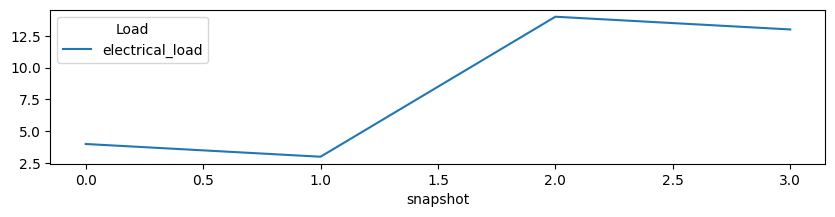

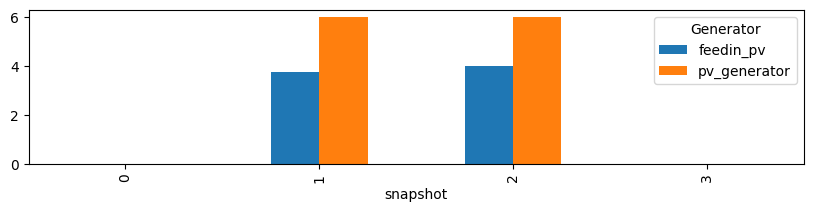

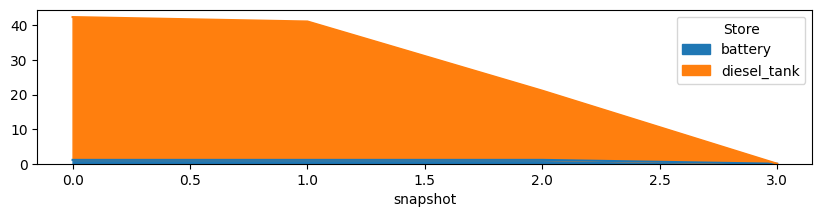

In [64]:
network_1.loads_t.p.plot(figsize=(10, 2))
network_1.generators_t.p.plot(kind="bar", figsize=(10, 2))
network_1.stores_t.e.plot(kind="area", figsize=(10, 2))